# Task 1

# Problem :
   Predict the different species of flowers on
   the length of there petals and sepals
   only Jupyter notebook code

In [127]:
#import all libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# Load the dataset

In [128]:
from sklearn.datasets import load_iris
iris=load_iris()

In [129]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [130]:
print(iris.columns)

AttributeError: columns

In [131]:
# Convert the data to a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [132]:
# Add the 'species' column to the DataFrame
df['Species'] = iris.target_names[iris.target]
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [133]:
print(iris.target_names)



['setosa' 'versicolor' 'virginica']


In [134]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [135]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [136]:
print(iris['data'].shape)
print(iris['target'].shape)


(150, 4)
(150,)


In [137]:
print(iris.target)
#here 0 means setosa,1 means versicolor and 2 means virginica

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# visualise the data

In [138]:
df.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

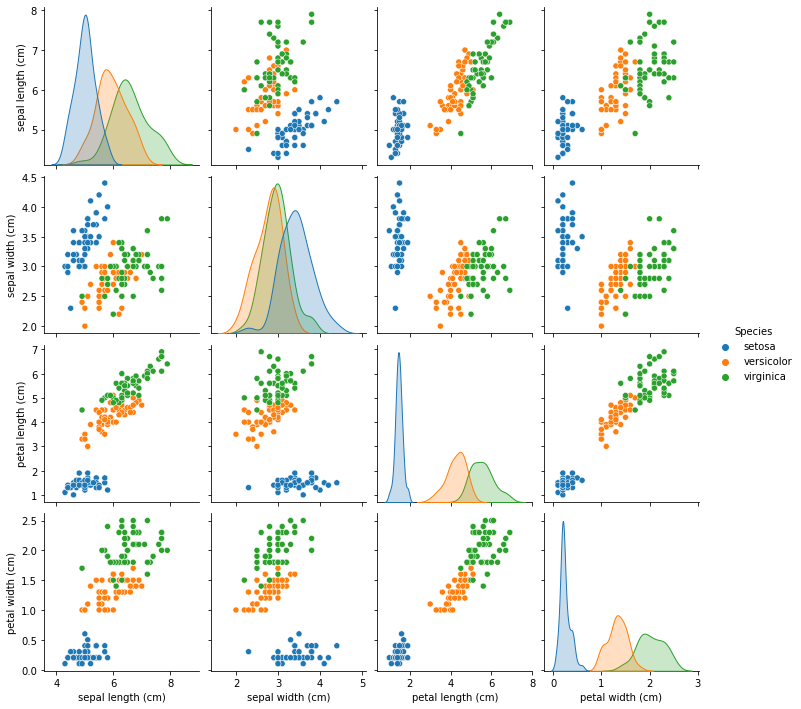

In [139]:
#create scatter plot matrix
sns.pairplot(df,hue='Species')


# Bar plot for different species and different parameters

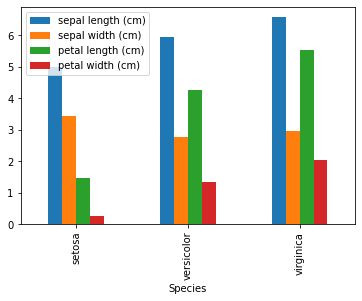

In [140]:
df.groupby('Species').mean().plot.bar()
plt.show()

# Spliting the data into training and testing

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(iris.data,iris.target,test_size =0.3)
print(X_test)

[[5.7 3.8 1.7 0.3]
 [5.5 2.6 4.4 1.2]
 [5.4 3.9 1.3 0.4]
 [5.  2.3 3.3 1. ]
 [5.8 2.7 4.1 1. ]
 [5.5 4.2 1.4 0.2]
 [6.3 3.4 5.6 2.4]
 [6.3 2.5 4.9 1.5]
 [7.2 3.  5.8 1.6]
 [5.4 3.9 1.7 0.4]
 [4.8 3.4 1.6 0.2]
 [5.4 3.  4.5 1.5]
 [6.4 2.7 5.3 1.9]
 [4.6 3.1 1.5 0.2]
 [6.3 2.9 5.6 1.8]
 [6.2 3.4 5.4 2.3]
 [7.1 3.  5.9 2.1]
 [5.6 2.8 4.9 2. ]
 [4.4 3.  1.3 0.2]
 [6.7 3.3 5.7 2.1]
 [6.1 2.6 5.6 1.4]
 [6.8 3.2 5.9 2.3]
 [6.7 2.5 5.8 1.8]
 [6.6 3.  4.4 1.4]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.4 2.1]
 [6.2 2.8 4.8 1.8]
 [5.5 2.4 3.7 1. ]
 [6.7 3.  5.  1.7]
 [5.1 3.8 1.6 0.2]
 [7.7 2.8 6.7 2. ]
 [5.  3.2 1.2 0.2]
 [5.6 3.  4.1 1.3]
 [6.  2.2 4.  1. ]
 [4.9 3.  1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.  3.  1.6 0.2]
 [5.5 2.4 3.8 1.1]
 [5.4 3.4 1.7 0.2]
 [6.3 3.3 6.  2.5]
 [6.2 2.2 4.5 1.5]
 [5.1 2.5 3.  1.1]
 [5.7 3.  4.2 1.2]
 [6.  3.4 4.5 1.6]
 [6.4 3.1 5.5 1.8]]


In [142]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9777777777777777

In [143]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

In [144]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9333333333333333

# for better accuracy measure i use cross_val_score

LogesticRegrssion

In [145]:
l_scores = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), iris.data, iris.target,cv=3)
l_scores

array([0.96, 0.96, 0.94])

In [146]:
np.average(l_scores)

0.9533333333333333

Decision Tree

In [147]:
d_scores = cross_val_score(DecisionTreeClassifier(), iris.data, iris.target,cv=3)
d_scores

array([0.98, 0.94, 0.98])

In [148]:
np.average(d_scores)

0.9666666666666667

Support vector machine

In [149]:
s_scores = cross_val_score(SVC(gamma='auto'), iris.data, iris.target,cv=3)
print(s_scores)
np.average(s_scores)

[0.98 0.98 0.96]


0.9733333333333333

RandomForest

In [150]:
r_scores = cross_val_score(RandomForestClassifier(n_estimators=40), iris.data, iris.target,cv=3)
print(r_scores)
np.average(r_scores)

[0.98 0.94 0.96]


0.96

In [151]:
prediction1 = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction1)*100)
for i in range(len(prediction1)):
    print(y_test[i], prediction1[i])
# ye loop bata raha ki kaha par data differnt show kar raha    

97.77777777777777
0 0
1 1
0 0
1 1
1 1
0 0
2 2
1 1
2 2
0 0
0 0
1 1
2 2
0 0
2 2
2 2
2 2
2 2
0 0
2 2
2 2
2 2
2 2
1 1
0 0
2 2
2 1
1 1
1 1
0 0
2 2
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
2 2
1 1
1 1
1 1
1 1
2 2


# Final prediction from user input 

In [152]:
x_new=np.array([[5, 2.9, 3.5, 0.3],[4, 3.8, 0.7, 1.5]])
prediction = svm.predict(x_new)
print("prediction: {}".format(prediction))
print("predicted target name: {}".format(iris['target_names'][prediction]))

prediction: [1 0]
predicted target name: ['versicolor' 'setosa']
